
<img style="float: right;" src="img/bo_logo.png" alt="Hochschule Bochum" width="30%" height="30%" title="Hochschule Bochum">
<p style="text-align: center;">
<b>Hochschule Bochum<br>
Fachbereich Informatik und Ingenieurwissenschaften<br>
Wahlmodul: Projektbasierte Vertiefung aktueller Themen der Informatik<br>
Betreuer: Prof. Dr. rer. nat. Henrik Blunck, Prof. Dr.-Ing. Ralph Lindken, Marc Ladwig (M.Sc.)</b><br>
</p>

___

## Aufbau des Notebooks
- Python Import
- Installationsanleitung
    - Paket- und Dependency-Installation über Anaconda in der Konsole
    - Verwendung von JupyterLab
- 1. Aufgabe und Daten erklären/beschreiben
    - Zusammenfassung
    - Aufgabe
    - Daten
    - KiDAQ-System (Drucksignale)
    - VIB-System (Schwingungssignale)
    - Beschreibung der Rohdatenstruktur
- 2. Deskriptive und Explorative Datenanalyse der KiDAQ-Daten
- 3. Preprocessing
    - Vorbereitung der Tainings- und Testdaten
        - Vorauswahl der Feature Einstellungen und Auswahl der Daten
        - Definition der Funktionen zum Preprocessing der verschiedenen Datentypen
        - Funktionem zum Preprocessing der Daten in den Frequenbereich und Generierung der Features
- 4. Maschinelles Lernen
    - Trainings- und Testdaten wählen und laden
        - Entscheidungsbaum - sklearn (empfohlen)
        - Konfiguration
        - Trainieren
    - Tiefes neuronales Netz - tensorflow
        - Konfiguration
        - Trainieren
    - Extremes Gradienten-Boosting - XGBoost
        - Konfiguration
        - Trainieren
- 5. Modelanalyse des Learners
- 6. Statische Interpretation des Resultats
    - Deskriptive und Explorative Datenanalyse
    - VIB-Fourier-Transformation

___

### Python Imports
Für die ordnungsgemäße Nutzung müssen einige Bibliotheken (Libraries) vorab importiert werden. Ein Import wird über das Schlüsselwort <b>import</b> durchgeführt, zusätzlich kann noch über das <b>as</b> der Name des importieren Pakets geändert werden.

In [1]:
from enum import Enum
import ipywidgets as widgets
from pandas import read_csv
import pandas as pd
import asammdf
from IPython.display import display
import os
import numpy as np
import time
import pathlib as pl

ldf is not supported
xls is not supported
xlsx is not supported


In [32]:
# Setting up the global variables

PATH_RAW_DATA = "./data/raw/"
PATH_FEATURE_DATA = "./data/"
PATH_EXPLORATION_DATA = "./exploration/"
PATH_MODEL = "./models/"
DATA_SOURCE_KIDAQ = ["TEST_NAME", "TEST_TYPE", "RPM", "FLOW_RATE", "P1", "P2"]
RAW_DATA_TYPE = ["KIDAQ", "VIB"]

DATA_SOURCE_VID = [
    "TEST_NAME",
    "TEST_TYPE",
    "RPM",
    "FLOW_RATE",
    "S1",
    "S2",
    "S3",
    "S4",
    "S5",
    "S6",
    "S7",
    "S8",
]
FEATURE = [
    "STD",
    "RANGE",
    "IQR",
    "MEAN_MEDIAN",
    "FFT",
]
OPERATING_POINT_FREQ = [725, 1450, 2175, 2900]
OPERATING_POINT_FLOW_RATE = [0, 25, 50, 75, 100]

DEFAULT_RAW_DATA_TYPE = RAW_DATA_TYPE[1]
DEFAULT_RAW_DATA = DATA_SOURCE_KIDAQ

DEFAULT_CLASS_LABEL = "TEST_TYPE"

___

## Installationsanleitung
1. Anleitung zur Installation von Anaconda, Python und JupyterLab
2. Paket- und Dependency-Installation über Anaconda in der Konsole
3. Verwendung von JupyterLab

___

## Anleitung zur Installation von Anaconda, Python und JupyterLab

Anleitung zur Installation von Anaconda, Python und JupyterLab
In dieser Anleitung werde ich Ihnen Schritt für Schritt erklären, wie Sie Anaconda, Python und JupyterLab richtig installieren können. Wir werden die Installation unter Windows durchführen.

### Schritt 1: Herunterladen von Anaconda
1. Öffnen Sie Ihren Webbrowser und gehen Sie zur offiziellen Anaconda-Website: https://www.anaconda.com/products/individual.
2. Wählen Sie die Version von Anaconda aus, die Ihrem Betriebssystem entspricht (Windows).
3. Klicken Sie auf den Download-Button und warten Sie, bis der Download abgeschlossen ist.

### Schritt 2: Installation von Anaconda
1. Navigieren Sie zum heruntergeladenen Anaconda-Installationsprogramm und starten Sie es.
2. Befolgen Sie die Anweisungen des Installationsprogramms. Standardmäßig wird Anaconda in das Verzeichnis "C:\Anaconda" installiert. Sie können jedoch einen anderen Installationsort auswählen, wenn Sie möchten.
3. Stellen Sie sicher, dass die Option "Add Anaconda to my PATH environment variable" aktiviert ist. Dadurch wird Anaconda in Ihrem Systempfad hinzugefügt, sodass Sie es über die Befehlszeile aufrufen können.
4. Klicken Sie auf "Install", um mit der Installation fortzufahren.
5. Warten Sie, bis die Installation abgeschlossen ist. Dies kann einige Minuten dauern.

### Schritt 3: Überprüfung der Installation von Anaconda
1. Öffnen Sie das Startmenü und suchen Sie nach "Anaconda Navigator".
2. Starten Sie den Anaconda Navigator aus den Suchergebnissen. Das Anaconda Navigator-Fenster wird geöffnet.
3. Überprüfen Sie, ob der Anaconda Navigator erfolgreich gestartet wird. Wenn ja, ist die Installation von Anaconda abgeschlossen.

### Schritt 4: Installation/Launch von JupyterLab
1. Öffnen Sie den Anaconda Navigator.
2. Im Anaconda Navigator-Fenster klicken Sie auf "Home" in der linken Seitenleiste.
3. Klicken Sie auf den Button Install/Launch unter der Karte mit dem Namen JupyterLab.
4. JupyterLab wird installiert/gestartet.
5. JupyterLab sollte in Ihrem Standard-Webbrowser geöffnet werden.
6. Überprüfen Sie, ob JupyterLab erfolgreich gestartet wird. Wenn ja, ist die Installation/Launch von JupyterLab abgeschlossen.

### Schritt 5: Überprüfung der Python-Installation
1. Öffnen Sie das Startmenü und suchen Sie nach "Anaconda Prompt".
2. Starten Sie die Anaconda Prompt aus den Suchergebnissen. Das Anaconda Prompt-Fenster wird geöffnet.
3. Geben Sie den folgenden Befehl ein und drücken Sie die Eingabetaste, um die Python-Version anzuzeigen: 
```bash
python --version
```
4. Überprüfen Sie, ob die installierte Python-Version angezeigt wird. Wenn ja, ist die Installation von Python erfolgreich abgeschlossen.


___

### Paket- und Dependency-Installation über Anaconda in der Konsole
1. Öffnen Sie das Startmenü und suchen Sie nach "Anaconda Prompt".
2. Starten Sie die Anaconda Prompt aus den Suchergebnissen. Das Anaconda Prompt-Fenster wird geöffnet.
3. Installieren Sie ein Paket oder eine Dependency, indem Sie den folgenden Befehl eingeben:
```bash
conda install paketname
```

Ersetzen Sie `paketname` durch den Namen des Pakets oder der Dependency, die Sie installieren möchten. Sie können auch mehrere Paketnamen angeben, indem Sie sie durch Leerzeichen trennen.

4. Warten Sie, bis die Installation abgeschlossen ist. Anaconda wird automatisch alle benötigten Abhängigkeiten herunterladen und installieren.
5. Überprüfen Sie, ob die Installation erfolgreich war, indem Sie das Paket oder die Dependency verwenden oder den folgenden Befehl ausführen, um eine Liste der installierten Pakete anzuzeigen:
```bash
conda list
```
Dadurch wird eine Liste aller installierten Pakete in der aktuellen Umgebung angezeigt.

8. Wiederholen Sie die Schritte 3-5 für alle weiteren Pakete oder Dependencies, die Sie installieren möchten.
9. Wenn Sie die Installation beendet haben, können Sie die Anaconda Prompt schließen oder mit weiteren Befehlen und Aktionen fortfahren.

___

### Verwendung von JupyterLab

1. Öffnen Sie das Startmenü und suchen Sie nach "Anaconda Navigator".

2. Starten Sie den Anaconda Navigator aus den Suchergebnissen. Das Anaconda Navigator-Fenster wird geöffnet.

3. Klicken Sie auf das Symbol für JupyterLab. Dadurch wird ein neues Browserfenster geöffnet, das die JupyterLab-Benutzeroberfläche anzeigt.

4. In der JupyterLab-Benutzeroberfläche können Sie entweder eine neue Datei erstellen oder vorhandene Dateien öffnen.

   - Um eine neue Datei zu erstellen, klicken Sie auf das "+" -Symbol in der Symbolleiste und wählen Sie den gewünschten Dateityp, z. B. "Python 3". Dadurch wird eine neue Datei geöffnet.

   - Um eine vorhandene Datei zu öffnen, klicken Sie auf "File" in der Menüleiste und wählen Sie "Open" aus. Navigieren Sie zum Speicherort der Datei auf Ihrem Computer und wählen Sie sie aus. Die Datei wird in einem neuen Tab geöffnet.

5. Jeder geöffnete Tab enthält eine Arbeitsfläche, in der Sie Code schreiben, Dateien anzeigen und bearbeiten, sowie andere Aktionen durchführen können.

6. JupyterLab bietet verschiedene Arten von Dokumenten, die Sie in der Arbeitsfläche verwenden können:

   - Jupyter Notebook: Sie können Jupyter Notebook-Dateien (.ipynb) öffnen und bearbeiten. Diese Dateien bestehen aus Zellen, die Code, Text oder Markdown enthalten können.

   - Texteditor: Sie können Textdateien (.txt), Python-Skripte (.py) und andere Textdateiformate anzeigen und bearbeiten.

   - Terminal: Sie können eine Befehlszeilenschnittstelle öffnen und Befehle direkt in JupyterLab ausführen.

7. Jeder Tab enthält eine Symbolleiste mit verschiedenen Optionen, um Aktionen wie das Ausführen von Code, das Hinzufügen neuer Zellen, das Speichern von Dateien und vieles mehr durchzuführen.

8. JupyterLab bietet auch eine Vielzahl von Tastenkombinationen, die Ihnen helfen können, schneller zu arbeiten. Sie können auf "Help" in der Menüleiste klicken und dann "Keyboard Shortcuts" auswählen, um eine Liste der verfügbaren Tastenkombinationen anzuzeigen.

9. Um JupyterLab zu beenden, können Sie das Browserfenster schließen oder zur JupyterLab-Benutzeroberfläche zurückkehren und auf "File" in der Menüleiste klicken, gefolgt von "Quit".


___

## 1. Aufgabe und Daten erklären/beschreiben [Philipp]

### Zusammenfassung
Die Zustandsüberwachung hydraulischer Anlagen und insbesondere Pumpen spielt eine wichtige Rolle bei der Sicherung eines korrekten Betriebs. Durch die Integration von künstlicher Intelligenz in vorrausschauende Systeme gewinnt die Predictive Maintenance gestützt durch künstliche Intelligenz an Bedeutung. Kreiselpumpen sind aufgrund ihrer Verbreitung in Industrie, Gewerbe und Haushalten besonders relevant für eine effiziente Betriebsweise. Schwingungsbasierte Systeme sind derzeit der Stand der Technik zur Überwachung von Pumpen, können jedoch nicht immer eindeutige Schlüsse auf die Ursachen von Schwingungen ziehen. In diesem Beitrag erfolgt ein Vergleich von druck- und schwingungsbasierten Zustandsüberwachungssystemen an einer typischen Kreiselpumpe.

### Aufgabe
Die Aufgabe besteht darin, die übergebenen Daten aus dem Pumpenprüfstand im Labor der Hochschule Bochum auszuwerten und in ein geeignetes KI-Modell zu überführen. Das KI-Modell soll in der Lage sein, den Zustand der Pumpe zu erkennen und zu klassifizieren. Diese Erkennung soll anhand der Prognosefähigkeit des Modells die Wartungsintervalle und die Nutzungsdauer der Pumpe optimieren.
Die Daten enthalten dabei sowohl Druck- als auch Schwingungssignale, die an unterschiedlichen Positionen an der Pumpe angebracht sind.<br>

<img src="img/positionierung_sensoren.png" alt="Positionierung Sensoren" width="40%" height="40%" title="Positionierung der Sensoren"><br>

Jede Messung wird dabei nach Erreichen eines stationären Förderstroms für 12 Minuten konstant gehalten. Während dieser Zeit werden die Messungen in hoher Frequenz aufgezeichnet und in den Formaten .mf4 und .csv abgespeichert. Beide Signalarten werden getrennt von einander durch zwei unterschiedliche System aufgezeichnet.
Das KiDAQ-System ist für die Aufzeichnung der Drucksignale zuständig und das VIB-System ist für die Aufnahme der Schwingungssignale zuständig. Beide Signalarten sollen innerhalb des Projektes zur Erarbeitung eines KI-Modells beitragen. Ebenfalls soll bewertet werden, ob es vielleicht auch ausreichend ist nur eine Signalart für die Erkennung des Pumpenzustandes zu verwenden.

### Daten
Wie bereits in der Vorstellung der Projektaufgabe kurz erläuert wurde, werden die Daten in zwei unterschiedlichen Formaten abgespeichert. Die Daten des KiDAQ-Systems werden im Format .mf4 abgespeichert und die Daten des VIB-Systems werden im Format .csv abgespeichert. Beide Datenarten werden im folgenden Abschnitt kurz erläutert.

#### KiDAQ-System (Drucksignale):
Das KiDAQ-System zeichnet die Messwerte der Drucksignale auf. Hierfür werden piezoelektrische Sensoren verwendet, die an den Positionen P1 und P2 an der Pumpe angebracht sind. Die Sensoren sind in der Lage Druckänderungen zu messen und in elektrische Signale umzuwandeln. Um die Messungen zu homogenisieren existiert für jede Messsequenz ein Formblatt, welches genau dokumentiert welcher Förderstrom (l/min) vorliegt, an welchem Datum und zu welcher Zeit die Messung durchgeführt wurde und mit welcher Drehzahl die Pumpe angetrieben wurde. Ebenfalls wurde festgehalten, ob es sich bei dem Versuch, um einen Gut-, Kavitations-, Fehlausrichtungs- oder Laufradschadenversuch gehandelt hat. Da während der Messung eine große Datenanzahl generiert wird, wird das mf4-Format zum Abspeichern verwendet. Das mf4-Format ist ein standardisiertes Format, das in der Messtechnik und in der Datenanalyse eingesetzt wird. 

#### VIB-System (Schwingungssignale):
Das VIB-System ist die Aufzeichnung der Schwingungssignals zuständig. VIB steht hierbei für Vibration. Es werden auch hier spezielle Sensoren an der Pumpe angebracht. Insgesamt sind XX Sensoren verbaut, die alle ausgelesen werden. Die Schwingungssignale werden nach dem selben Prinzip wie die Drucksignale aufgezeichnet. Sie wandeln eltromagnetische Schwingungen in elektrische Signale um. Die Messungen werden ebenfalls in einem Formblatt dokumentiert. Die Formblätter sind identisch zu den Formblättern des KiDAQ-Systems. Die Messungen werden in einem .csv-Format abgespeichert. Das .csv-Format lässt sich hierbei ohne Umformungsschritt sofort auslesen und vereinfacht somit die Arbeit, allerdings zu den kosten der Dateigröße.


___

### Beschreibung der Rohdatenstruktur [Philipp]
Die Rohdaten des Pumpen Versuchs wurden ins in folgender Form übergeben:
* Pumpensetup
  * Versuchsart
    * Formblatt
    * Aufzeichnungssystem
      * VIB-System
      * KiDAQ-System
      * Umrichterdaten
  

Das Pumpensetup gibt hierbei an um welche Pumpe es sich handelt und an welcher Stelle sich welche Sensoren befinden. Für unsere Auswertung wurden uns zwei unterschiedliche Setups übergeben. Das erste Setup nennt sich innerhalb der Ordnerstruktur Setup-I und das zweite Setup nennt sich Setup-II.
In jedem Setup-Ordner befinden sich die Versuchsarten.
Das Versuchsart-Verzeichnis gibt an, um welche Art von Versuch es sich handelt. Hierbei gibt es vier unterschiedliche Versuchsarten, welche in unterschiedlicher Anzahl vorliegen:
- Gutversuch 
- Kavitationsversuch
- Fehlausrichtungsversuch
- Laufradschadenversuch

Alle Versuchsarten sind in den beiden Setups enthalten und werden im späteren Verlauf auch für die Erzeugung des KI-Modells und/oder für die Validation eingesetzt.

Ebenfalls interessant ist das Formblatt. Es definiert in welcher Position sich die Pumpe zur Versuchsreihe befunden hat und zeigt ebenfalls die Ausrichtung der Messensensoren. Ebenfalls wird hier dokumentiert, welche Drehzahl die Pumpe angetrieben hat und welcher Förderstrom vorlag. Das Format der Formblätter ist für jede Versuchsart identisch.

Die beiden Aufzeichnungssysteme, die bereits im vorherigen Abschnitt erläutert wurden, enthalten die Messdaten: VIB für Schwingungssignale und KiDAQ für Drucksignale. Beide System verwenden unterschiedliche Dateiformate

___

### 2. Deskriptive und Explorative Datenanalyse der KiDAQ-Daten
Um die Daten deskriptiv und explorativ auszuwerten, müssen die Daten visualisert werden. Um diesen Prozess zu automatisieren und dadurch zu vereinfachen können innerhalb dieses interaktiven Abschnitts verschiedene Einstellungen vorgenommen werden, um sich Plots zu generieren.
Diese Plots werden innerhalb des Notebooks angezeigt und können Einzeln oder als Serie abgespeichert werden.

Um den kidaq-folder Pfad ordnungsgemäß zu setzen kann dieser einfach aus dem Explorer kopiert und wie folgt eingefügt werden: r'<FOLDER_PATH>'

In [1]:
# E:\Messdaten\Setup-I\2021-04-28 - Gut 1 as pathlib path
kidaq_folder = r'E:\Messdaten\Setup-I\2021-04-28 - Gut 1\KiDAQ'

Nun kann der Ordner ausgewählt werden aus dessen Dateien später die Plots generiert werden.

In [ ]:
# create a path object
path = pl.Path(kidaq_folder)
# list all folders in the path
folders = [str(x) for x in path.iterdir() if x.is_dir()]
# create a widget to select the folders
select = widgets.Select(
    options=folders,
    value=folders[0],
    description='Folders:',
    disabled=False,
    layout=widgets.Layout(width='90%')
)
display(select)

Über die Window-Size kann die Größer der Fenster eingestellt werden. Standardmäßig werden 100.000 Punkte zu einem Fenster zusammengefügt.

In [ ]:
# set window size
window_size_int = widgets.BoundedIntText(
    value=100000,
    min=0,
    max=1000000,
    step=1,
    description='Window Size:',
    disabled=False
)
display(window_size_int)

Über die Step-Size kann die Verschiebung der einzelnen Fenster eingestellt werden. Stellen wir diesen ebenfalls auf 100.000 kommt es zu keiner Überlappung, da jedes Fenster immer um 100.000 Punkte weitergeschoben wird. Stellen wir allerdings die Step-Size kleiner als die Window-Size, so kommt es zu einer Überlappung der Fenster, da die selben Punkte nun in mehreren Fenstern liegen können.

In [ ]:
# set window size
step_size_int = widgets.BoundedIntText(
    value=100000,
    min=0,
    max=1000000,
    step=1,
    description='Step Size:',
    disabled=False
)
display(step_size_int)

Die letzte Einstellung beinhaltet die Aggregation der Werte. Es kann hierbei zwischen 'median', 'std', 'min' und 'max' gewählt werden. Die Aggregation bezieht sich hierbei immer auf die einzelnen Fenster. Alle Punkte innerhalb des Fenstern werden mittels der Aggregation zusammen gerechnet und es entsteht ein neuer einzelner Punkte pro Fenster. Aus diesem Grund ist es manchmal Ratsam eine Fensterüberlappung zu zulassen.

In [ ]:
agg_type_dropdown = widgets.Dropdown(
    options=['median', 'std', 'min', 'max'],
    value='median',
    description='Aggregation:',
    disabled=False,
)
display(agg_type_dropdown)

Der letzten und längste Schritt ist nun die Generierung der einzelnen Plots untereinander.

In [ ]:
# read mdf file in loop and aggregate data
# create a path object
path = pl.Path(select.value)
# list all mdf files in the path
mdf_files = [x for x in path.iterdir() if x.is_file() and x.suffix == '.mf4']
# loop over all mdf files
for mdf_file in mdf_files:
    # create a mdf object
    mdf_obj = asammdf.MDF(mdf_file)
    # transform to dataframe
    df = mdf_obj.to_dataframe()
    # aggregate data
    df_agg = df[['p1', 'p2']].rolling(window=window_size_int.value, step=step_size_int.value).agg(agg_type_dropdown.value)
    # give title to plot example: median of 2021-04-28 - Gut 1_725rpm@0% 
    title = f'{agg_type_dropdown.value} of {mdf_file.stem}'
    # plot data
    df_agg.plot(title=title, grid=True)

___

## 3. Preprocessing [Valerij]

Aufgeteilt nach KIDAQ und VIB (separat um es einfach zu halten)

- Auswahl der Fenstergröße in Millisekunden
- Auswahl der Abtastrate
- Multi-Selektion der Aggregation (avg, mean, std, ...)
- Frequenzanalyse
- Fourier-Transformation
- Fenstergröße nach Frequenzbereichen

### 3.1 Vorbereitung der Tainings- und Testdaten

Multi-Selektion für:

- Features
- Betriebspunkte (RPM/FLOWRATE)
- Klassifikationsarten (Szenario / Testdurchlauf)


### Vorauswahl der Feature Einstellungen und Auswahl der Daten

In [3]:
WINDOW_SIZE_MS = ["100", "200", "300", "400", "500", "600", "700", "800","900","1000"]
AGGREGATIONS = ["std", "range", "iqr", "median"]

win_sizes = widgets.Dropdown(
    placeholder= "Choose the window size in ms",
    options = WINDOW_SIZE_MS,
    description = "Window size in ms: ",
    ensure_option=True,
    disabled = False
)
display(win_sizes)

raw_data_type = widgets.Dropdown(
    placeholder= "Choose the raw data type",
    options = RAW_DATA_TYPE,
    description = "Raw data type: ",
    ensure_option=True,
    disabled = False
)
display(raw_data_type)

# list all available directories in data/raw with max depth of 1
raw_data_folders = [f.name for f in os.scandir(PATH_RAW_DATA) if f.is_dir()]
raw_data_folder = widgets.Dropdown(
    placeholder= "Choose the raw data folder",
    options = raw_data_folders,
    description = "Raw data folder: ",
    ensure_option=True,
    disabled = False
)
display(raw_data_folder)





Dropdown(description='Window size in ms: ', options=('100', '200', '300', '400', '500', '600', '700', '800', '…

Dropdown(description='Raw data type: ', options=('KIDAQ', 'VIB'), value='KIDAQ')

Dropdown(description='Raw data folder: ', options=(), value=None)

### Definition der Funktionen zum Preprocessing der verschiedenen Datentypen

In [ ]:

from tqdm.notebook import tqdm
COLUMNS_KiDAQ = [
    "p1",
    "p2",
    "a2",
    "T2",
    "T1"
]


CWD = pl.Path.cwd()

PATH_RAW_DATA = CWD / "data" / "raw"
PATH_TO_SETUP = PATH_RAW_DATA / raw_data_folder.value 


if raw_data_type.value == "KIDAQ":
    raw_files = [file for file in PATH_TO_SETUP.glob("**/*.mf4") if "KiDAQ" in file.parts]    
elif raw_data_type.value == "VIB":
    raw_files = [file for file in PATH_TO_SETUP.glob("**/*.csv") if "Rohdaten CSV" in file.parts]
def process_vib(file):
    # error_type is the first folder name after the setup folder
    error_type_with_number = file.parts[8]
    error_type = error_type_with_number.split(" ")[0]
    rpm = file.parts[10].split("r")[0]
    rpm_percent = file.parts[11].split("%")[0]
    sensor = file.parts[-1].split(" ")[0]
    version = file.parts[12] if file.parts[12] != None else '0'

    df = read_csv(file, skiprows=2, encoding="ISO-8859-1", sep=";")

    df["Timestamp [ns]"] = pd.to_datetime(df["Timestamp [ns]"], unit="ns")
    df = df.set_index("Timestamp [ns]")
    resampled = df.resample("1s")

    df_mean = resampled.mean()
    df_mean = df_mean.rename(columns={"Value": f"{sensor}_mean"})
    df_range = resampled.max() - resampled.min()
    df_range = df_range.rename(columns={"Value": f"{sensor}_range"})
    df_std = resampled.std()
    df_std = df_std.rename(columns={"Value": f"{sensor}_std"})
    df_iqr = resampled.quantile(0.75) - resampled.quantile(0.25)
    df_iqr = df_iqr.rename(columns={"Value": f"{sensor}_iqr"})
    df_mean_median = resampled.mean() - resampled.median()
    df_mean_median = df_mean_median.rename(columns={"Value": f"{sensor}_mean_median"})

    df = pd.concat([df_mean, df_range, df_std, df_iqr, df_mean_median], axis=1)
    df["Fehlertyp"] = error_type_with_number
    df["Fehlertyp_allgemein"] = error_type
    df["rpm"] = rpm
    df["rpm%"] = rpm_percent
    df["version"] = version
    df = df.reset_index()
    df = df.drop(columns=["Timestamp [ns]"])
    df["ID"] = df.index
    df = df.melt(
        id_vars=["ID", "Fehlertyp", "Fehlertyp_allgemein", "rpm", "rpm%", "version"],
        var_name="Aggregation",
        value_name="Value",
    )

    return df 

    


def process_kidaq(file):
    
    error_type_with_number = file.parts[8]
    error_type = error_type_with_number.split(" ")[0]
    rpm = file.parts[10].split("r")[0]
    rpm_percent = file.parts[11].split("m")[1].split("%")[0]
    
    mdf = asammdf.MDF(file)
    df = mdf.to_dataframe()
    df = df.reset_index()

    df = df[COLUMNS_KiDAQ]

    df_features = None

    windows = df.groupby(df.index // (int(win_sizes.value) * 20))

    for _, window in windows:

        features = {
            "Fehlertyp": error_type_with_number, 
            "Fehlertyp_allgemein": error_type,
            "rpm": rpm, 
            "rpm%": rpm_percent
            }

        features["p1_std"] = window["p1"].std()
        features["p2_std"] = window["p2"].std()
        features["a2_std"] = window["a2"].std()
        features["T2_std"] = window["T2"].std()
        features["T1_std"] = window["T1"].std()
        
        features["p1_range"] =  window["p1"].max() - window["p1"].min()
        features["p2_range"] =  window["p2"].max() - window["p2"].min()
        features["a2_range"] =  window["a2"].max() - window["a2"].min()
        features["T2_range"] =  window["T2"].max() - window["T2"].min()
        features["T1_range"] =  window["T1"].max() - window["T1"].min()
        
        features["p1_iqr"] = window["p1"].quantile(0.75) - window["p1"].quantile(0.25)
        features["p2_iqr"] = window["p2"].quantile(0.75) - window["p2"].quantile(0.25)
        features["a2_iqr"] = window["a2"].quantile(0.75) - window["a2"].quantile(0.25)
        features["T2_iqr"] = window["T2"].quantile(0.75) - window["T2"].quantile(0.25)
        features["T1_iqr"] = window["T1"].quantile(0.75) - window["T1"].quantile(0.25)
        
        features["p1_mean_median"] = window["p1"].mean() - window["p1"].median()
        features["p2_mean_median"] = window["p2"].mean() - window["p2"].median()
        features["a2_mean_median"] = window["a2"].mean() - window["a2"].median()
        features["T2_mean_median"] = window["T2"].mean() - window["T2"].median()
        features["T1_mean_median"] = window["T1"].mean() - window["T1"].median()

        if df_features is None:
            df_features = pd.DataFrame(features, index=[0])    
        else:
            df_features = pd.concat([df_features, pd.DataFrame(features, index=[0])])

    return df_features


### Funktionem zum Preprocessing der Daten in den Frequenbereich und Generierung der Features

In [ ]:
def process_freq_kidaq(file):

    error_type_with_number = file.parts[8]
    error_type = error_type_with_number.split(" ")[0]
    rpm = file.parts[10].split("r")[0]
    rpm_percent = file.parts[11].split("m")[1].split("%")[0]
    
    mdf = asammdf.MDF(file)
    df = mdf.to_dataframe()
    df.index = pd.to_timedelta(df.index, unit="s")

    resample_time = df.resample("1s")

    r = resample_time.aggregate(lambda sample: np.fft.fft)

    
    df_fft = pd.DataFrame(np.fft.fft(df))

    df_fft.columns = df.columns
    df_fft.index = df.index
    df_fft.index = pd.to_timedelta(df_fft.index, unit="s")
    df_fft = df_fft.apply(np.abs)
    resampled = df_fft.resample("1s")

    df_mean = resampled.mean().to_numpy()
    df_range = resampled.max() - resampled.min()
    df_range = df_range.to_numpy()
    df_std = resampled.std().to_numpy()
    df_iqr = resampled.quantile(0.75) - resampled.quantile(0.25)
    df_iqr = df_iqr.to_numpy()
    df_mean_median = resampled.mean() - resampled.median()
    df_mean_median = df_mean_median.to_numpy()

    data = np.concatenate((np.repeat([[error_type_with_number, error_type, rpm, rpm_percent]], df_mean.shape[0], axis=0), df_mean, df_range, df_std, df_iqr, df_mean_median), axis=1)

    with open("fft_test.csv", "a") as f:
        for feature in data:
            f.write(";".join(feature) + "\n")    

    



for file in tqdm(raw_files):
    df = process_freq_kidaq(file) 

In [ ]:

FREQ_WINDOWS = 16

def process_freq_kidaq(file):

    error_type_with_number = file.parts[8]
    error_type = error_type_with_number.split(" ")[0]
    rpm = file.parts[10].split("r")[0]
    rpm_percent = file.parts[11].split("m")[1].split("%")[0]
    
    mdf = asammdf.MDF(file)
    df = mdf.to_dataframe()
    df = df.reset_index()

    df = df[COLUMNS_KiDAQ]

    df_features = None

    windows = df.groupby(df.index // (int(win_sizes.value) * 20))

    for _, window in windows:

        for col in window.columns:
            X = np.fft.fft(window[col])
            amps = np.abs(X)

            xf = np.fft.fftfreq(len(window[col]), 1 / 20000)

            idxMax = np.argmax(amps)

            if df_features is None:
                df_features = np.concatenate(([xf[idxMax]], [amps[idxMax]]), axis=0)
            else:
                df_features = np.concatenate((df_features, [xf[idxMax]], [amps[idxMax]]), axis=0)

            freqs_window_size = len(amps) / FREQ_WINDOWS

            for x in range(FREQ_WINDOWS):
                freq_window = amps[int(x*freqs_window_size):int((x+1)*freqs_window_size)]
                df_features = np.concatenate((df_features, [np.max(freq_window, axis=0)], [np.average(freq_window, axis=0)], [np.mean(freq_window, axis=0)] ), axis=0)

    df_features = np.concatenate(([error_type_with_number], [error_type], [rpm], [rpm_percent], df_features), axis=0) 

    with open(f"data/freq_{raw_data_type}_features.csv", "w") as f:
        f.write(";".join(df_features))

    # for _, window in windows:

    #         for col in window.columns:
    #             X = np.fft.fft(window[col])
    #             amps = np.abs(X)

    #             xf = np.fft.fftfreq(len(window[col]), 1 / 20000)

    #             idxMax = np.argmax(amps)

    #             # create a dataframe with two columns amps and xf
    #             df_fft = pd.DataFrame({'amps': amps, 'xf': xf})

    #             freqs_window_size = len(amps) / FREQ_WINDOWS

    #             for x in range(FREQ_WINDOWS):
    #                 freq_window = amps[int(x*freqs_window_size):int((x+1)*freqs_window_size)]
    #                 window_features = {
    #                     "Fehlertyp": error_type_with_number,
    #                     "Fehlertyp_allgemein": error_type,
    #                     "rpm": rpm,
    #                     "rpm%": rpm_percent,
    #                     "xf_max": xf[idxMax],
    #                     "amps_max": amps[idxMax],
    #                     "amps_max_window": np.max(freq_window, axis=0),
    #                     "amps_avg_window": np.average(freq_window, axis=0),
    #                     "amps_mean_window": np.mean(freq_window, axis=0)
    #                 }

    #                 if df_features is None:
    #                     df_features = pd.DataFrame(window_features, index=[0])
    #                 else:
    #                     df_features = pd.concat([df_features, pd.DataFrame(window_features, index=[0])])


    # if not pl.Path(f"freq_{raw_data_type}_1_features.csv").exists():
    #     df_features.to_csv(f"data/freq_{raw_data_type}_features.csv", header=True, index=False, sep=";")
    # else:
         
    #     df_features.to_csv(f"freq_{raw_data_type}_1_features.csv", mode='a', header=False, index=False, sep=";")


        
for file in tqdm(raw_files):
    process_freq_kidaq(file)



  0%|          | 0/20 [00:00<?, ?it/s]

#### Durch ausführen der folgenden Zelle, werden die Daten mit den ausgewählten Parametern vorbereitet und abgespeichert

___

## 4. Maschinelles Lernen [Kevin]

In diesem Bereich können, mithilfe drei verschiedener Learner, Modell anhand der generierten Trainings- und Testdaten erzeugt werden.

### 4.1 Trainings- und Testdaten wählen und laden

In [33]:
# SELECT TRAINING AND TEST DATA
featureDataDir = list(filter(lambda x: os.path.isfile(os.path.join(PATH_FEATURE_DATA, x)) and DEFAULT_RAW_DATA_TYPE in x.upper(), os.listdir(PATH_FEATURE_DATA)))

trainFileDropdown = widgets.Dropdown(description="training data")
trainFileDropdown.options = featureDataDir
display(trainFileDropdown)

testFileDropdown = widgets.Dropdown(description="test data")
testFileDropdown.options = featureDataDir
display(testFileDropdown)


Dropdown(description='training data', options=('vib.test.setup2.csv', 'vib.train.setup1.csv'), value=None)

Dropdown(description='test data', options=('vib.test.setup2.csv', 'vib.train.setup1.csv'), value=None)

In [73]:
# LOAD DATA
csvTrain = read_csv(PATH_FEATURE_DATA + trainFileDropdown.value, delimiter=";")
csvTest = read_csv(PATH_FEATURE_DATA + testFileDropdown.value, delimiter=";")

DATA_INDEX_CLASS = 1
DATA_INDEX_TIME_BASED = 2
DATA_INDEX_FREQ_BASED = 12

trainData = csvTrain.values
testData = csvTest.values


featureNames = csvTrain.columns.values[DATA_INDEX_TIME_BASED:].tolist()
trainX, trainY = trainData[:, DATA_INDEX_TIME_BASED:].astype(np.float32), trainData[:, DATA_INDEX_CLASS:DATA_INDEX_CLASS+1]
testX, testY = testData[:, DATA_INDEX_TIME_BASED:].astype(np.float32), testData[:, DATA_INDEX_CLASS:DATA_INDEX_CLASS+1]

### 4.2 Entscheidungsbaum - sklearn (empfohlen)


In diesem Abschnitt wird mit der sklearn-Bibliothek ein Entscheidungsbaummodell trainiert. Dabei können verschiedene Parameter frei gewählt werden, wie die maximale Baumtiefe, die gewünschte Mindestgenauigkeit und die Anzahl der Suchiterationen.
Das Programm wird dann versuchen, ausgehend von einer Baumtiefe von eins, einen möglichst einfachen Entscheidungsbaum zu generieren, der die gewünschte Genauigkeit erreicht.

#### 4.2.1 Konfiguration

In [48]:
DT_MAX_DEPTH = 16                           # Maximum depth of the tree
DT_EXPLORATION_TARGET_VAL_ACCURACY = 0.9   # Target accuracy for the decision tree
DT_EXPLORATION_MAX_ITER = 10000              # Maximum number of iterations for the random search
DT_VERBOSE = False                          # Verbose logging for the decision tree

#### 4.2.2 Trainieren

In [67]:
# Train DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from IPython.display import clear_output
import joblib

labelEncoder = LabelEncoder()
labelEncoder = labelEncoder.fit(np.ravel(trainY))
labelEncodedTrainY = labelEncoder.transform(np.ravel(trainY))
labelEncodedTestY = labelEncoder.transform(np.ravel(testY))


testAccuracy = 0.0
trainAccuracy = 0.0
iterations = 0
depth = 1
while (
    testAccuracy < DT_EXPLORATION_TARGET_VAL_ACCURACY
    or trainAccuracy < DT_EXPLORATION_TARGET_VAL_ACCURACY
) and iterations < DT_EXPLORATION_MAX_ITER:
    # Create decision tree classifier
    

    dt = DecisionTreeClassifier(max_depth=depth, splitter="random")
    dt.fit(trainX, labelEncodedTrainY)

    testPredictions = dt.predict(testX)
    testAccuracy = accuracy_score(labelEncodedTestY, testPredictions)

    trainPredictions = dt.predict(trainX)
    trainAccuracy = accuracy_score(labelEncodedTrainY, trainPredictions)
    iterations += 1

    if DT_VERBOSE:
        print("Iteration: %d" % iterations)
        print("Depth: %d" % depth)
        print("Train Accuracy: %.2f%%" % (trainAccuracy * 100.0))
        print("Test Accuracy: %.2f%%" % (testAccuracy * 100.0))
    


    depth = 1 + iterations // (DT_EXPLORATION_MAX_ITER // DT_MAX_DEPTH)


print("Iteration: %d" % iterations)
print("Depth: %d" % depth)
print("Train Accuracy: %.2f%%" % (trainAccuracy * 100.0))
print("Test Accuracy: %.2f%%" % (testAccuracy * 100.0))

modelName = "dtc." + str(round(time.time()))
os.makedirs(PATH_MODEL + modelName)
with open(PATH_MODEL + modelName + "/encoder.pickle", "wb") as f:
    joblib.dump(labelEncoder, f)
joblib.dump(dt, PATH_MODEL + modelName + "/dtc.model")

Iteration: 5524
Depth: 9
Train Accuracy: 98.17%
Test Accuracy: 99.76%


['./models/dtc.1685906701/dtc.model']

### 4.3 Tiefes neuronales Netz - tensorflow

Im folgenden Abschnitt wird mit der tensorflow-Bibliothek ein tiefes neuronales Netzwerk trainiert. Dabei können verschiedene Parameter eingestellt werden, wie die gewünschte Mindestgenauigkeit, die Anzahl der Suchiterationen, die minimale und maximale Anzahl an Schichten und Neuronen, die Toleranz für einen vorzeitigen Abbruch einer Iteration, die Ausgabeform, die maximale Anzahl an Epochen, die Batchgröße und die Batch Normalisierung.

Bitte beachte, dass die genaue Syntax und die verfügbaren Optionen von tensorflow abhängen können. Es ist empfehlenswert, die offizielle tensorflow-Dokumentation für detaillierte Informationen zu konsultieren.

#### 4.3.1 Konfiguration

In [60]:
DNN_EXPLORATION_TARGET_VAL_ACCURACY = 0.9  # Target accuracy for the neural network
DNN_EXPLORATION_MAX_ITER = 50              # Maximum number of iterations for the random search
DNN_EXPLORATION_HIDDEN_LAYERS_MIN = 1       # Minimum number of hidden layers
DNN_EXPLORATION_HIDDEN_LAYERS_MAX = 3       # Maximum number of hidden layers
DNN_EXPLORATION_NEURONS_MIN = 8             # Minimum number of neurons per layer
DNN_EXPLORATION_NEURONS_MAX = 32            # Maximum number of neurons per layer


DNN_EARLY_STOPPING_PATIENCE = 50            # Patience for early stopping
DNN_VERBOSE = 0                             # Verbosity level for the neural network
DNN_EPOCHS = 2000                           # Maximum number of epochs for the neural network
DNN_BATCH_SIZE = 256                        # Batch size for the neural network
DNN_BATCH_NORMALIZATION = True              # Batch normalization for the neural network

#### 4.3.2 Trainieren

In [74]:
# Train Neural Network
import json
import random
import joblib
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

onehotencoder = OneHotEncoder()
onehotencoder = onehotencoder.fit(trainY)
onehotEncodedTrainY = onehotencoder.transform(trainY).toarray()
onehotEncodedTestY = onehotencoder.transform(testY).toarray()

explorationResults = []


numberOfFeatures = trainX.shape[1]
categorieCount = len(onehotEncodedTrainY[0])

testAccuracy = 0.0
trainAccuracy = 0.0
model = Sequential()
interation = 0
while (
    testAccuracy < DNN_EXPLORATION_TARGET_VAL_ACCURACY
    or trainAccuracy < DNN_EXPLORATION_TARGET_VAL_ACCURACY
) and interation < DNN_EXPLORATION_MAX_ITER:
    model = Sequential()
    model.add(InputLayer(input_shape=(numberOfFeatures,)))
    if DNN_BATCH_NORMALIZATION:
        model.add(BatchNormalization())
    denseCount = random.randint(
        DNN_EXPLORATION_HIDDEN_LAYERS_MIN, DNN_EXPLORATION_HIDDEN_LAYERS_MAX
    )
    denseNeurons = []
    for i in range(0, denseCount):
        neuronCount = random.randint(
            DNN_EXPLORATION_NEURONS_MIN, DNN_EXPLORATION_NEURONS_MAX
        )
        denseNeurons.append(neuronCount)
        model.add(Dense(neuronCount, activation="tanh"))
        if DNN_BATCH_NORMALIZATION:
            model.add(BatchNormalization())
    model.add(Dense(categorieCount, activation="sigmoid"))
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    model.fit(
        trainX,
        onehotEncodedTrainY,
        epochs=DNN_EPOCHS,
        batch_size=DNN_BATCH_SIZE,
        verbose=DNN_VERBOSE,
        validation_data=(testX, onehotEncodedTestY),
        callbacks=[
            EarlyStopping(
                monitor="val_loss",
                patience=DNN_EARLY_STOPPING_PATIENCE,
                restore_best_weights=True,
            )
        ],
    )

    trainLoss, trainAccuracy = model.evaluate(trainX, onehotEncodedTrainY)
    testLoss, testAccuracy = model.evaluate(testX, onehotEncodedTestY)

    explorationResults.append(
        {
            "dense_count": denseCount,
            "dense_neurons": denseNeurons,
            "train_loss": trainLoss,
            "train_acc": trainAccuracy,
            "test_loss": testLoss,
            "test_acc": testAccuracy,
        }
    )
    interation += 1

modelName = "dnn." + str(round(time.time()))

model.save(PATH_MODEL + modelName)

with open(PATH_MODEL + modelName + "/encoder.pickle", "wb") as f:
    joblib.dump(onehotencoder, f)

with open(PATH_EXPLORATION_DATA + modelName + ".exploration_results.json", "w") as f:
    json.dump(explorationResults, f, indent=4)

225/225 [==============================] - 0s 759us/step - loss: 0.1024 - accuracy: 0.9649


INFO:tensorflow:Assets written to: ./models/dnn.1685908079\assets


INFO:tensorflow:Assets written to: ./models/dnn.1685908079\assets


### 4.4 Extremes Gradienten-Boosting - XGBoost

In diesem Abschnitt wird mit der xgboost-Bibliothek ein Modell mithilfe des "Extreme Gradient Boosting" trainiert. Dabei können verschiedene Parameter frei gewählt werden, wie die maximale Anzahl der Bäume, die gewünschte Mindestgenauigkeit und die Anzahl der Suchiterationen.

#### 4.4.1 Konfiguration

In [30]:
DT_MAX_DEPTH = 10                           # Maximum depth of the tree
DT_EXPLORATION_TARGET_VAL_ACCURACY = 0.95   # Target accuracy for the decision tree
DT_EXPLORATION_MAX_ITER = 100               # Maximum number of iterations for the random search
DT_VERBOSE = False                          # Verbose logging for the decision tree
DT_NUM_OF_ESTIMATORS = None                 # number of estimators (default = None -> number of estimators = number of classes)

#### 4.4.2 Trainieren

In [ ]:
# Train XGBClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import joblib


labelEncoder = LabelEncoder()
labelEncoder = labelEncoder.fit(np.ravel(trainY))
labelEncodedTrainY = labelEncoder.transform(np.ravel(trainY))
labelEncodedTestY = labelEncoder.transform(np.ravel(testY))

testAccuracy = 0.0
trainAccuracy = 0.0
iterations = 0
while (
    testAccuracy < DT_EXPLORATION_TARGET_VAL_ACCURACY
    or trainAccuracy < DT_EXPLORATION_TARGET_VAL_ACCURACY
) and iterations < DT_EXPLORATION_MAX_ITER:
    xgb = XGBClassifier(
        tree_method="hist",
        enable_categorical=True,
        max_depth=DT_MAX_DEPTH,
        n_estimators=labelEncoder.classes_.size if DT_NUM_OF_ESTIMATORS == None else DT_NUM_OF_ESTIMATORS,
        random_state=np.random.randint(1000000)
    )
    # fit model
    labeledTrainX = pd.DataFrame(trainX, columns=featureNames)
    labeledTestX = pd.DataFrame(testX, columns=featureNames)

    xgb.fit(
        labeledTrainX, labelEncodedTrainY, eval_set=[(labeledTestX, labelEncodedTestY)], verbose=1 if DT_VERBOSE else 0
    )

    testPredictions = xgb.predict(testX)
    testAccuracy = accuracy_score(labelEncodedTestY, testPredictions)

    trainPredictions = xgb.predict(trainX)
    trainAccuracy = accuracy_score(labelEncodedTrainY, trainPredictions)
    iterations += 1
    if DT_VERBOSE:
        print("Train Accuracy: %.2f%%" % (trainAccuracy * 100.0))
        print("Test Accuracy: %.2f%%" % (testAccuracy * 100.0))

modelName = "xgb." + str(round(time.time()))
os.makedirs(PATH_MODEL + modelName)

with open(PATH_MODEL + modelName + "/encoder.pickle", "wb") as f:
    joblib.dump(labelEncoder, f)


XGBClassifier.save_model(xgb, PATH_MODEL + modelName + "/xgb.model")

featureMap = xgb.get_booster().get_score(importance_type="gain")

with open(PATH_MODEL + modelName + "/feature_map.txt", "w") as file:
    for index, feature in enumerate(xgb.get_booster().feature_names):
        file.write(f"{index}\t{feature}\tq\n")


print("Accuracy: %.2f%%" % (testAccuracy * 100.0))

___

## 5. Modelanalyse des Learners [Kevin]

**In diesem Abschnitt können in Abhängigkeit von der Auswahl des zu analysierenden Modells verschiedene Analysen durchgeführt werden.**

- *Visuelle Darstellung (nur Entscheidungsbaum/Extremes Gradienten-Boosting)*: Eine visuelle Darstellung des Modells kann erstellt werden, um die Entscheidungslogik und Struktur intuitiv zu erfassen.

- *Konfusionsmatrix*: Eine Konfusionsmatrix wird erstellt, um die Leistung des Modells bei der Klassifikation zu bewerten. Sie zeigt, wie gut das Modell verschiedene Klassen korrekt vorhersagt und welche Fehler gemacht werden.

- *Test-Genauigkeit*: Die Test-Genauigkeit wird berechnet, um zu bewerten, wie gut das Modell auf unbekannten Daten abschneidet. Dies gibt einen Indikator dafür, wie zuverlässig die Vorhersagen des Modells sind.

- *Feature Importances*: Es wird eine Analyse der Feature Importances durchgeführt, um die relative Bedeutung der verschiedenen Merkmale bei der Vorhersage zu bestimmen. Dies ermöglicht Einblicke in die relevanten Merkmale und kann bei der Feature-Auswahl oder -Gewichtung helfen.

Diese Analysen bieten einen umfassenden Einblick in die Leistung und Funktionsweise des ausgewählten Modells und unterstützen bei der Interpretation der Ergebnisse.

In [53]:
# SELECT LEARNER AND TEST DATA
featureDataDir = list(filter(lambda x: os.path.isfile(os.path.join(PATH_FEATURE_DATA, x)) and DEFAULT_RAW_DATA_TYPE in x.upper(), os.listdir(PATH_FEATURE_DATA)))
modelDir = os.listdir(PATH_MODEL)

modelDropdown = widgets.Dropdown(description="model")
modelDropdown.options = modelDir
display(modelDropdown)

testFileDropdown = widgets.Dropdown(description="test data")
testFileDropdown.options = featureDataDir
display(testFileDropdown)


Dropdown(description='model', options=('dnn.1685488608', 'dtc.1685894279', 'dtc.1685894304', 'dtc.1685894720',…

Dropdown(description='test data', options=('vib.test.setup2.csv', 'vib.train.setup1.csv'), value=None)

Selected model: dnn.1685488608
225/225 [==============================] - 0s 632us/step


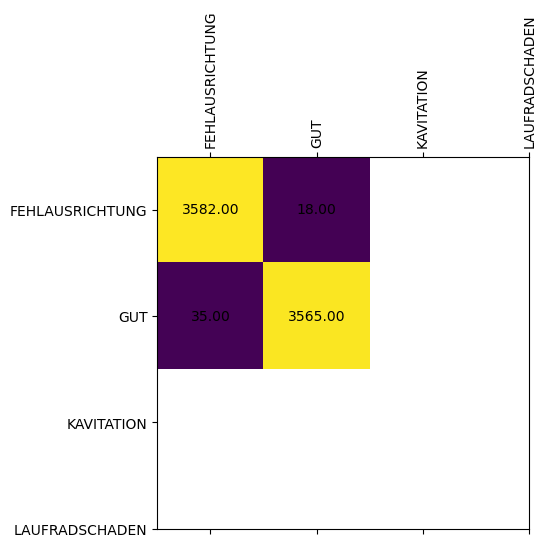

Test Accuracy: 0.993
225/225 [==============================] - 0s 630us/step
Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0161 ± 0.0003  S5_IQR
0.0143 ± 0.0011  S1_IQR
0.0086 ± 0.0003  S1_STD
0.0060 ± 0.0002  S2_RANGE
0.0059 ± 0.0004  S6_IQR
0.0025 ± 0.0007  S5_STD
0.0020 ± 0.0004  S1_MEAN_MEDIAN
0.0019 ± 0.0002  S4_RANGE
0.0012 ± 0.0001  S8_STD
0.0001 ± 0.0000  S7_MEAN_MEDIAN
     0 ± 0.0000  RPM
-0.0004 ± 0.0002  S8_MEAN_MEDIAN
-0.0005 ± 0.0000  S2_IQR
-0.0007 ± 0.0001  S2_STD
-0.0010 ± 0.0003  S5_RANGE
-0.0012 ± 0.0002  S5_MEAN_MEDIAN
-0.0015 ± 0.0003  S2_MEAN_MEDIAN
-0.0017 ± 0.0002  S3_RANGE
-0.0021 ± 0.0008  S3_IQR
-0.0022 ± 0.0

In [71]:
# ANALYZE MODEL
import tensorflow as tf
from tensorflow import math as tfmath
import tensorflow_probability as tfp
import eli5
from eli5.sklearn import PermutationImportance
import joblib
from matplotlib import pyplot
from xgboost import XGBClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

selectedTestFile = testFileDropdown.value
selectedModelFile = modelDropdown.value

print("Selected model: " + selectedModelFile)

csvTest = read_csv(PATH_FEATURE_DATA + selectedTestFile, delimiter=";")
testData = csvTest.values

testX, testY = testData[:,2:].astype(np.float32), testData[:, DATA_INDEX_CLASS:DATA_INDEX_CLASS+1]
featureNames = csvTest.columns.values[2:].tolist()

model = None
predictions = None
transformedTestY = None
confusionMatrix = None
classes = None
if (selectedModelFile.startswith('dnn')):
    onehotencoder = None
    with open(PATH_MODEL + selectedModelFile + '/encoder.pickle', 'rb') as f:
        onehotencoder = joblib.load(f)
    classes = onehotencoder.categories_[0]
    transformedTestY = onehotencoder.transform(testY).toarray()    

    model = tf.keras.models.load_model(PATH_MODEL + selectedModelFile)
    predictions = model.predict(testX)

    confusionMatrix = tf.math.confusion_matrix(np.argmax(transformedTestY, axis=1), np.argmax(predictions, axis=1))
    equality = tf.math.equal(np.argmax(predictions, axis=1), np.argmax(transformedTestY, axis=1))
    accuracy = tf.math.reduce_mean(tf.cast(equality, tf.float32))
elif (selectedModelFile.startswith('xgb')):
    labelEncoder = None
    with open(PATH_MODEL + selectedModelFile + '/encoder.pickle', 'rb') as f:
        labelEncoder = joblib.load(f)
    classes = labelEncoder.classes_
    transformedTestY = labelEncoder.transform(np.ravel(testY))

    model = XGBClassifier()
    model.load_model(PATH_MODEL + selectedModelFile + '/xgb.model')
    predictions = model.predict(testX)
    confusionMatrix = tfmath.confusion_matrix(transformedTestY, predictions)

    for i in range(model.n_estimators):
        plot_tree(model, num_trees=i, fmap=PATH_MODEL + selectedModelFile + '/feature_map.txt')
        pyplot.gcf().set_dpi(1200)
        pyplot.show()


    #pyplot.show()
    equality = tf.math.equal(predictions, transformedTestY)
    accuracy = tf.math.reduce_mean(tf.cast(equality, tf.float32))
elif (selectedModelFile.startswith('dtc')):
    labelEncoder = None
    with open(PATH_MODEL + selectedModelFile + '/encoder.pickle', 'rb') as f:
        labelEncoder = joblib.load(f)
    classes = labelEncoder.classes_
    transformedTestY = labelEncoder.transform(np.ravel(testY))

    model = joblib.load(PATH_MODEL + selectedModelFile + '/dtc.model')

    predictions = model.predict(testX)
    accuracy = accuracy_score(transformedTestY, predictions)
    confusionMatrix = tfmath.confusion_matrix(transformedTestY, predictions)
    plt.figure(figsize=(120, 40))       
    tree.plot_tree(model, feature_names=featureNames, class_names=labelEncoder.classes_, filled=True)
    plt.show()

mat = pyplot.matshow(confusionMatrix, 1)
mat.axes.set_xticks(np.arange(0, len(classes), 1))
mat.axes.set_yticks(np.arange(0, len(classes), 1))
mat.axes.set_xticklabels(classes, rotation=90)
mat.axes.set_yticklabels(classes)
for (x, y), value in np.ndenumerate(confusionMatrix):
    pyplot.text(y, x, f"{value:.2f}", va="center", ha="center")
pyplot.show()


print('Test Accuracy: %.3f' % accuracy)


#correlationMatrix = tfp.stats.correlation(testX)
#pyplot.matshow(correlationMatrix)
#pyplot.show()

perm = PermutationImportance(model, scoring="neg_mean_squared_error", random_state=1).fit(testX, transformedTestY)
print(eli5.format_as_text(eli5.explain_weights(perm, feature_names=featureNames)))

___

## 6. Statische Interpretation des Resultats

### 6.1 Deskriptive und Explorative Datenanalyse
Die deskriptive Datenanalyse der Gutdaten ergab interessante Erkenntnisse. Eine Fehlausrichtung zeigt sich durch die Umkehrung von p1 und p2. Dieser Effekt wird besonders deutlich, wenn der maximale Förderstrom (100%) betrachtet wird. In diesem Fall wird die Fehlausrichtung sehr gut sichtbar.

<img src="img/kidaq_visualisierung.png" alt="KiDAQ Visualisierung" width="40%" height="20%" title="KiDAQ Visualisierung"><br>

Ein Laufradschaden hingegen äußert sich durch eine vergrößerte Entfernung zwischen p1 und p2. Besonders auffällig ist, dass sich dieser Abstand auch beim maximalen Förderstrom (100%) weiter vergrößert. Es zeigt sich also ein Trend, dass sowohl p1 als auch p2 sich voneinander entfernen, welches auf einen möglichen Laufradschaden hinweisen könnte.

Das Resultat der Untersuchung ist, dass Veränderungen der Daten bereits anhand der unterschiedlichen Messreihen erkannt werden können. Sowohl die Fehlausrichtung, als auch der Laufradschaden lassen sich durch die Analyse der p1- und p2-Werte identifizieren. Dies ermöglicht eine frühzeitige Erkennung von potenziellen Problemen und gibt die Möglichkeit, geeignete Maßnahmen zur Behebung einzuleiten, bevor schwerwiegendere Schäden auftreten.

Die deskriptive Datenanalyse liefert somit wertvolle Informationen, um die Qualität der Daten zu beurteilen und potenzielle Abweichungen oder Schäden zu erkennen. Durch regelmäßige Überprüfung der Messreihen können frühzeitig Anomalien festgestellt und entsprechende Maßnahmen ergriffen werden, um die Funktionalität und Zuverlässigkeit der untersuchten Systeme aufrechtzuerhalten.

### 6.2 VIB-Fourier-Transformation
Bei der Transformation der VIB-Daten ergab sich kein eindeutiges Bild. Die Überführung der Vibrationen in einen absoluten Zustandsraum zeigte jedoch interessante Ergebnisse. Es wurde ein signifikanter Peak bei 11 kHz sowie generell Frequenzen im hochfrequenten Bereich festgestellt.

<img src="img/vib_fourier_transformation.png" alt="VIB Fourier Transformation" width="20%" height="40%" title="VIB Fourier Transformation"><br>

Der Peak bei 11 kHz deutet auf eine starke Aktivität oder Resonanz in diesem Frequenzbereich hin. Dies könnte auf eine bestimmte Komponente oder ein Phänomen hinweisen, das bei dieser Frequenz besonders präsent ist. Es ist wichtig, diese Beobachtung genauer zu untersuchen, um die genaue Ursache für den Peak zu ermitteln und mögliche Auswirkungen auf das System zu verstehen.

Darüber hinaus ist es interessant zu bemerken, dass auch im allgemeinen hochfrequenten Bereich Frequenzen auffällig sind. Dies könnte auf eine Vielzahl von Effekten oder Aktivitäten hindeuten, die im Hochfrequenzspektrum auftreten. Es ist ratsam, weitere Analysen durchzuführen, um die Natur dieser Frequenzen zu bestimmen und festzustellen, ob sie mit bekannten Mustern oder Problemen in Verbindung stehen.

Insgesamt deutet die Transformation der VBS-Daten auf eine komplexe und vielfältige Verteilung von Frequenzen hin, die auf verschiedene Phänomene im untersuchten System hinweisen könnten. Es ist wichtig, diese Ergebnisse weiter zu untersuchen, um ein besseres Verständnis für die zugrunde liegenden Mechanismen zu erlangen und mögliche Auswirkungen auf die Leistung oder den Zustand des Systems zu bewerten.
